# Visualizing Our Data
We have had a look at our table in various variants so far.<br>
Now we will finally visualize our data and get a first dea about how we can predict results.<br>
We will think about predicting the qualifying grid, the race position and the championship points scored.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
#As always, we need to load our data (file name: race_df_with_advanced_features.pkl):
race_df = pd.read_pickle('race_df_with_advanced_features.pkl')
race_df.head(5)

qgrid_pos  Nr.       Driver      Team  fp2_pos     fp2_t  fp3_pos  \
0          3    8    F. Alonso   Ferrari      9.0  117140.0      1.0   
1          2    7     F. Massa   Ferrari      7.0  116555.0      6.0   
2          4    2  L. Hamilton   McLaren      2.0  115854.0     12.0   
3          1    5    S. Vettel  Red Bull      5.0  116459.0      5.0   
4          5    4   N. Rosberg  Mercedes      1.0  115409.0      2.0   

      fp3_t  fp1_pos     fp1_t  ...  hist_fp2_pos  hist_fp3_pos  hist_fp1_pos  \
0  114099.0      2.0  116766.0  ...           NaN           NaN           NaN   
1  114739.0      4.0  117055.0  ...           NaN           NaN           NaN   
2  115860.0      6.0  117163.0  ...           NaN           NaN           NaN   
3  114646.0     13.0  117943.0  ...           NaN           NaN           NaN   
4  114368.0      8.0  117199.0  ...           NaN           NaN           NaN   

   hist_q_pos  hist_race_pos  best_fp_pos  worst_fp_pos mean_fp_pos  \
0         NaN            NaN          1.0           3.0         2.0   
1         NaN            NaN          6.0           1.0         5.0   
2         NaN            NaN         12.0           4.0         6.0   
3         NaN            NaN          5.0          10.0         7.0   
4         NaN            NaN          2.0           5.0         1.0   

   r_hist_qgrid_pos_2_fp  r_hist_race_pos_2_fp  
0                    NaN                   NaN  
1                    NaN                   NaN  
2                    NaN                   NaN  
3                    NaN                   NaN  
4                    NaN                   NaN  

[5 rows x 50 columns]

## Plotting with Seaborn:
To get a first idea of what kind of plots are possible, spend a minute on the Seaborn gallery:<br>
https://seaborn.pydata.org/examples/index.html

### Configure Seaborn

In [3]:
#Here we can configure some options, we will need later:
sns.set_theme() #Using Shift-tab-tab, you can get the options

### Now we can create our very first plot:
We will need to load our data set into a sns object and tell it what columns, we want to plot.<br>
https://seaborn.pydata.org/examples/scatter_bubbles.html

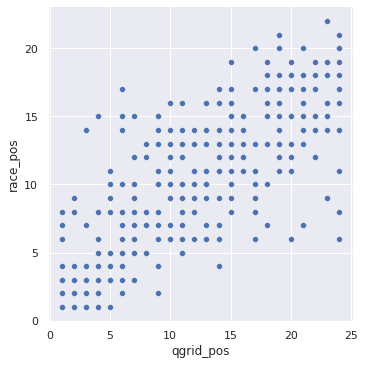

In [4]:
#First, we will plot the qualifying grid and race position of the year 2010
sns.relplot(
    data=race_df[race_df['year']==2010],
    x="qgrid_pos",
    y="race_pos",
)

### This plot indicates a correlation.
We should keep that in mind, as this could be helpful information to predict race results.<br>
Play with other years, and have a look at what year might be easy to predict.<br>
Seaborn has some good posibilities to visualize data that can get grouped.<br>
Plot the data from above but for all years, however color the dots by year.



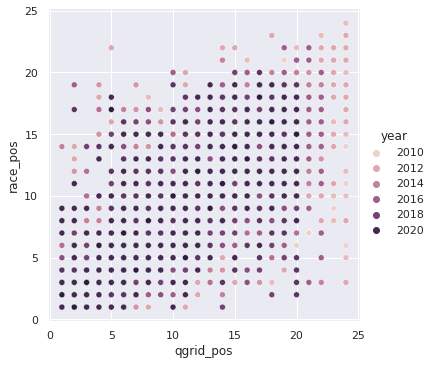

In [5]:
#Create a plot with all years, color by year
sns.relplot(
    data=race_df,
    x="qgrid_pos",
    y="race_pos",
    hue="year",
)

### Improve a scatter plot
This scatter lot might be missleading as many dots might be overlapping.<br>
We will have to somehow take this possiblity into acount.<br>
One option to fix this, is a kde plot:<br>
https://seaborn.pydata.org/examples/multiple_bivariate_kde.html

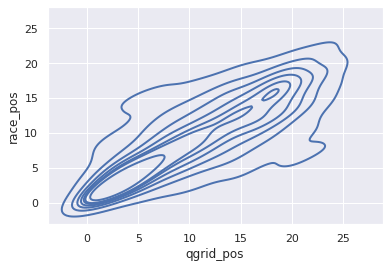

In [6]:
#Print the data using the sns kdeplot:
sns.kdeplot(data=race_df,
            x="qgrid_pos",
            y="race_pos",
            levels=8,
            linewidths=2)

One more option is the violin plot:

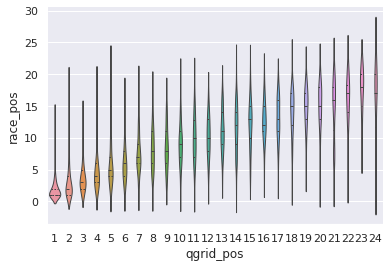

In [7]:
sns.violinplot(data=race_df,
               x="qgrid_pos",
               y="race_pos",
               split=True,
               inner="quart",
               linewidth=1,
              )
sns.despine(left=True)

### Lets improve the plots
Now we can see some of the information but these plots do not look very nice, yet.<br>
They need titles, need to be resized. Maybe you do not like the color?<br>
The plots can individually get recolored, but it is better to use a theme.<br>
This also help to keep everything consistent.<br>
To change axis labes and add a title use:
```
our_plot = sns.relplot(...)
our_plot.set(title='our_title', xlabel='our x label',ylabel='our y label')
```
To change the size, depending on the type of plot use:
```
our_plot.fig.set_figwidth(14)
our_plot.fig.set_figheight(4)

sns.set(rc={"figure.figsize":(16, 5)})

```
Sometimes Seaborn will not quite pick up on this new information in a Jupyter Notebook.<br>
If this happens, you will have to restart the notebook.


In [8]:
#Set new options for style and palette
#Seaborn is well made, by using a style like "bannanas", you will create an error message that informs you about valid options
sns.set_theme(style='darkgrid',
    palette='rocket_r')
sns.set(rc={"figure.figsize":(16, 5)})

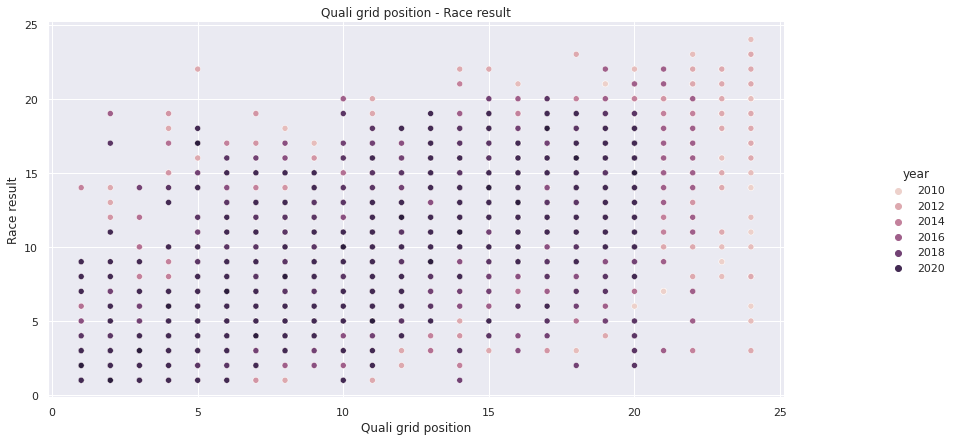

In [9]:
#Execute the plot then add title, axis lables and resize the plot:
scatter_plot = sns.relplot(
                data=race_df,
                x="qgrid_pos",
                y="race_pos",
                hue="year",
                )

scatter_plot.set(title='Quali grid position - Race result', 
                 xlabel='Quali grid position', 
                 ylabel='Race result')

scatter_plot.fig.set_figwidth(14)
scatter_plot.fig.set_figheight(6)

Another idea to improve this plot, would be to add some "jitter" to it. If you have some time left over later, you can try to implement this. With Jitter, dots get pushed slightly out of position. This helps visualizing the amount of dots in one space. Or, if you are allready compfortable with Pandas, why not scale the size of the dots by the amount of data points on one sort?

[Text(0, 0.5, 'Race result'),
 Text(0.5, 0, 'Quali grid position'),
 Text(0.5, 1.0, 'Quali grid position - Race result')]

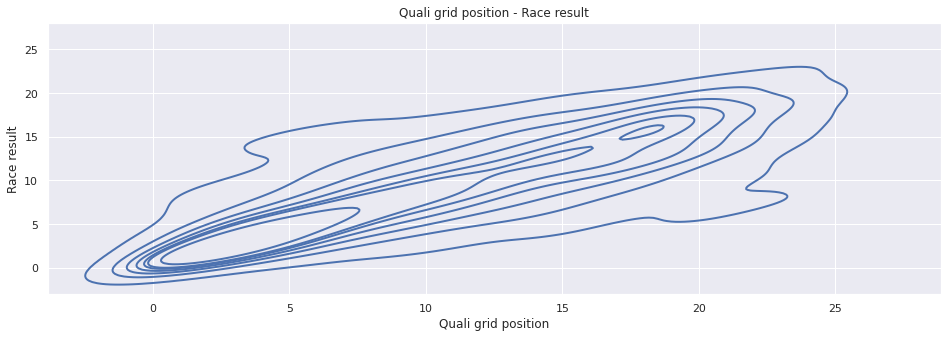

In [10]:
#Execute the plot then add title, axis lables and resize the plot:
kde_plot = sns.kdeplot(data=race_df,x="qgrid_pos",y="race_pos", levels=8, linewidths=2,)
                       
#sns.set(rc={"figure.figsize":(16, 5)})

kde_plot.set(title='Quali grid position - Race result', 
             xlabel='Quali grid position', 
             ylabel='Race result')


[Text(0, 0.5, 'Race result'),
 Text(0.5, 0, 'Quali grid position'),
 Text(0.5, 1.0, 'Quali grid position - Race result')]

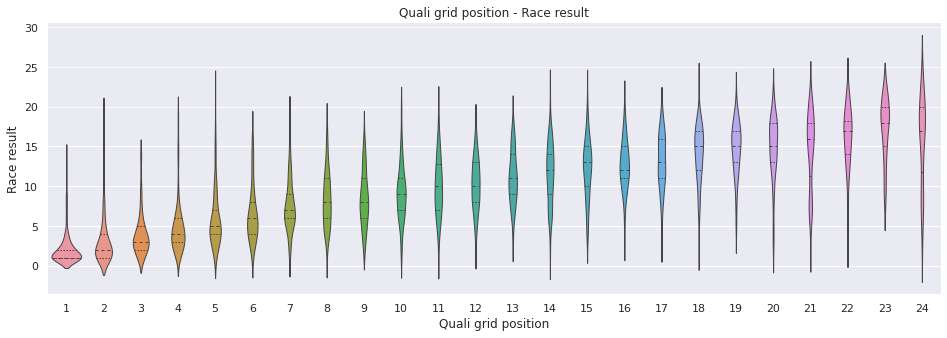

In [11]:
#Execute the plot then add title, axis lables and resize the plot:
v_plot = sns.violinplot(data=race_df,
                        x="qgrid_pos",
                        y="race_pos",
                        split=True,
                        inner="quart",
                        linewidth=1,
                      )
sns.despine(left=True)

v_plot.set(title='Quali grid position - Race result', 
                 xlabel='Quali grid position', 
                 ylabel='Race result')


Looking at this violin plot, it does appear that starting from the front will likely score a good result.
It is interesting to see that positions 24 and 21 (I would expect 20) have a strange shape. A driver can get sent the the back of the grid because of some rule violations and depening on the year this could be either position 24 or 20. In this case, we have a relatively very good driver at the end. This driver will have a rather good chance of driving back to the top.

## For those that still have some time on their hands:
Go back to the correletation plot at the top. Filter by race name and look at how things correlete in Monaco.